<a href="https://colab.research.google.com/github/AmirBassemAdibAbdou/AmirBassemAdibAbdou/blob/main/AssignmentOneDataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

dataset = pd.read_csv('loan_approval_dataset.csv')

In [ ]:
#a
print(dataset.head(12))
print(dataset.tail(12))

    Applicant_ID  Age  Income  Credit_Score  Loan_Amount  Loan_Term  \
0              1   56   21920           639       452748         72   
1              2   69  126121           655       257134         60   
2              3   46   96872           467       226437         72   
3              4   32  101132           751       310480         12   
4              5   60   22093           404        13070         12   
5              6   25   32905           449         6320         24   
6              7   38  141759           445       356187         72   
7              8   56  175423           598       306065         24   
8              9   36   50981           466        11589         24   
9             10   40   93903           347       462625         48   
10            11   28   90821           538       360139         60   
11            12   28  129200           306        20589         36   

    Interest_Rate Employment_Status  Debt_to_Income_Ratio Marital_Status  \


In [ ]:
#b prints the rows and columns in the form of x and y the left is the rows
print(f"total number of rows and columns present\n {dataset.shape}")

total number of rows and columns present
 (5000, 14)


In [ ]:
#c datatypes of all columns
print(f"all column names along with their corresponding data types \n{dataset.dtypes}")

all column names along with their corresponding data types 
Applicant_ID              int64
Age                       int64
Income                    int64
Credit_Score              int64
Loan_Amount               int64
Loan_Term                 int64
Interest_Rate           float64
Employment_Status        object
Debt_to_Income_Ratio    float64
Marital_Status           object
Number_of_Dependents      int64
Property_Ownership       object
Loan_Purpose             object
Previous_Defaults         int64
dtype: object


In [ ]:
#d access the first column and gets its name
print(f"name of the first column \n{dataset.columns[0]}")

name of the first column 
Applicant_ID


In [ ]:
#e prints the columns and their count along with their datatypes and datatype count
print(f"summary of the dataset, including non-null counts and data types \n{dataset.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Applicant_ID          5000 non-null   int64  
 1   Age                   5000 non-null   int64  
 2   Income                5000 non-null   int64  
 3   Credit_Score          5000 non-null   int64  
 4   Loan_Amount           5000 non-null   int64  
 5   Loan_Term             5000 non-null   int64  
 6   Interest_Rate         5000 non-null   float64
 7   Employment_Status     5000 non-null   object 
 8   Debt_to_Income_Ratio  5000 non-null   float64
 9   Marital_Status        5000 non-null   object 
 10  Number_of_Dependents  5000 non-null   int64  
 11  Property_Ownership    5000 non-null   object 
 12  Loan_Purpose          5000 non-null   object 
 13  Previous_Defaults     5000 non-null   int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 547.0+ KB
summary of th

In [ ]:
#f pints unique values in the loan purpose attribute
print(f"distinct values of Loan purpose is {dataset['Loan_Purpose'].nunique()}")

distinct values of Loan purpose is 5


In [ ]:
#g most repeated value
print(f"most frequent value in Loan_Purpose \n{dataset['Loan_Purpose'].mode()}")

most frequent value in Loan_Purpose 
0    Personal
Name: Loan_Purpose, dtype: object


In [ ]:
#h describe shows general statistics about dataset
print(f" mean, median, standard deviation, percentiles \n{dataset.describe()}")

 mean, median, standard deviation, percentiles 
       Applicant_ID          Age         Income  Credit_Score   Loan_Amount  \
count   5000.000000  5000.000000    5000.000000   5000.000000    5000.00000   
mean    2500.500000    43.584600  110220.247000    574.183200  252118.47900   
std     1443.520003    14.919094   52075.384023    160.437715  142580.00452   
min        1.000000    18.000000   20028.000000    300.000000    5050.00000   
25%     1250.750000    31.000000   64751.000000    434.750000  129940.25000   
50%     2500.500000    43.000000  110180.500000    573.000000  250846.50000   
75%     3750.250000    56.000000  155749.750000    715.000000  378021.75000   
max     5000.000000    69.000000  199992.000000    849.000000  499651.00000   

         Loan_Term  Interest_Rate  Debt_to_Income_Ratio  Number_of_Dependents  \
count  5000.000000    5000.000000           5000.000000           5000.000000   
mean     41.769600       8.873018             27.177244              2.010200 

In [ ]:
#2-a #gets rows where the loan purpose equals personal condition
print(f"filter loan_purpose where == personal: \n{(dataset['Loan_Purpose'] == 'Personal')}")

filter loan_purpose where == personal: 
0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999     True
Name: Loan_Purpose, Length: 5000, dtype: bool


In [ ]:
#2-b select the loan purpose column and uses the method apply that uses every record in the loan purpose and checks if it starts with p and get the sum
count = dataset['Loan_Purpose'].apply(lambda x: x.startswith('P')).sum()
print(f" Loan_purposes count startint with P{count}")

 Loan_purposes count startint with P1042


In [ ]:
#2-c #count duplicates and remove them
duplicate_count = dataset.duplicated().sum()
print(f"lDuplicate Rows count: {duplicate_count}")
#shows the dataset after removing duplicates
dataset.drop_duplicates(inplace=True)
print(f"Dataset Shape After Removing Duplicates: {dataset.shape}")

lDuplicate Rows count: 0
Dataset Shape After Removing Duplicates: (5000, 14)


In [ ]:
#2-d makes the interest rate dataset converted datatype to str and str is an ob
dataset['Interest_Rate'] = dataset['Interest_Rate'].astype(str)
print(f"interest rate is converted to str object: {dataset['Interest_Rate'].dtype}")

interest rate is converted to str object: object


In [ ]:
#2-e
# groups the dataset by 2 categorical attributes loanpurpose and ownership
grouped_data = dataset.groupby(['Loan_Purpose', 'Property_Ownership'])

# Analyze the results using their average
res = grouped_data['Loan_Amount'].mean()

# Prints the result
print(res)

Loan_Purpose  Property_Ownership
Business      Mortgage              257440.155556
              Own                   252015.533923
              Rent                  256648.154098
Car           Mortgage              242072.672464
              Own                   251975.938462
              Rent                  258327.942029
Education     Mortgage              251414.979769
              Own                   254340.521084
              Rent                  249471.782875
Home          Mortgage              248592.723724
              Own                   257764.853372
              Rent                  245474.213115
Personal      Mortgage              250394.322188
              Own                   250378.979710
              Rent                  255272.241848
Name: Loan_Amount, dtype: float64


In [ ]:
#2-f # gets sum of missing values and prints it
missing_values = dataset.isnull().sum()
print(missing_values)

Applicant_ID            0
Age                     0
Income                  0
Credit_Score            0
Loan_Amount             0
Loan_Term               0
Interest_Rate           0
Employment_Status       0
Debt_to_Income_Ratio    0
Marital_Status          0
Number_of_Dependents    0
Property_Ownership      0
Loan_Purpose            0
Previous_Defaults       0
dtype: int64


In [ ]:
#2-g
  #loop on dataset columns
for column in dataset.columns:
    if dataset[column].isnull().any():  #if a column has missing value
        #if the column has an integer datatype get the median as it can be calculated using numeric values
        if dataset[column].dtype in ['int64', 'float64']:
            median = dataset[column].median()
            # fill the column with the median
            dataset[column].fillna(median, inplace=True)
            print(f"Filled missing values in '{column}' with median: {median}")
        else:  #if the column is not numerical it gets the most repeated value and puts it in the attribute
            mode = dataset[column].mode()[0]  # Get the first mode if there are multiple
            dataset[column].fillna(mode, inplace=True)
            print(f"Filled missing values in '{column}' with mode: {mode}")

# Verify imputation
missing_values_after = dataset.isnull().sum()
print("\nMissing values after imputation:\n", missing_values_after)


Missing values after imputation:
 Applicant_ID            0
Age                     0
Income                  0
Credit_Score            0
Loan_Amount             0
Loan_Term               0
Interest_Rate           0
Employment_Status       0
Debt_to_Income_Ratio    0
Marital_Status          0
Number_of_Dependents    0
Property_Ownership      0
Loan_Purpose            0
Previous_Defaults       0
dtype: int64


In [ ]:
#2-h
# does like discretization by dividing the loan amount bins to 5 bins and counts their values and
dataset['Bins'] = pd.cut(dataset['Loan_Amount'], bins=5)

# Count the number of records in each bin
bin_counts = dataset['Bins'].value_counts()

# Print the bin counts
#display the count and ranges
print(bin_counts)

Bins
(202890.4, 301810.6]    1040
(400730.8, 499651.0]    1024
(103970.2, 202890.4]    1016
(4555.399, 103970.2]     993
(301810.6, 400730.8]     927
Name: count, dtype: int64


In [ ]:
#2-i
#index of the row with the maximum 'Loan_Amount'
max_loan_amount_index = dataset['Loan_Amount'].max()

# Print the row
print(f"Max value of Loan_Amount: {max_loan_amount_index}")

Max value of Loan_Amount: 499651


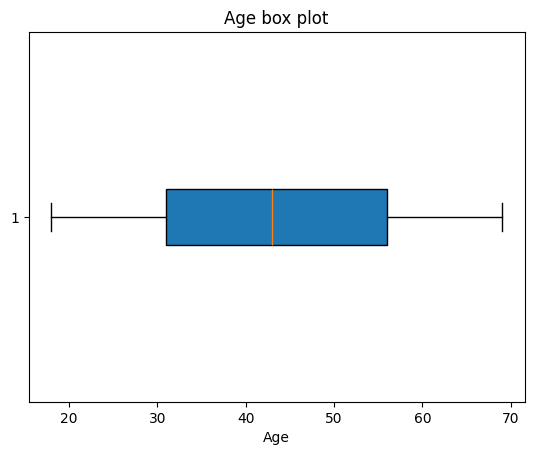

In [ ]:
#2-j
# age because it shows me what is the range of people wanting loans


# Create a boxplot for 'Age'
#making the figure size 8 by 8

#make horizontal box plot of the age and the patch artisit gives the look and the color of the boxplot
plt.boxplot(dataset['Age'], vert=False, patch_artist=True)  # Customize appearance
#label the box plot as age
plt.xlabel('Age')
#title of the box plot
plt.title('Age box plot')
plt.show()

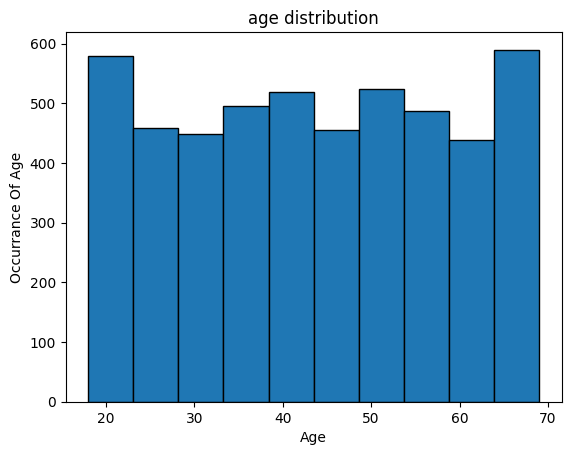

In [ ]:
#2-k
#make a histogram for the age and divide to 10 bins
plt.hist(dataset['Age'], bins=10, edgecolor='black')
#x and y axis labels
plt.xlabel('Age')
plt.ylabel('Occurrance Of Age')
plt.title('age distribution')
plt.show()

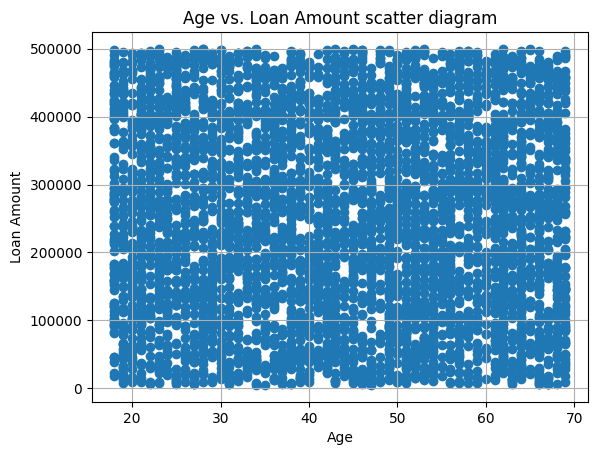

In [ ]:
#2-I I chose between age and loan amount because you can guess what the money will buy for that age
#create a scatter plot for the age and loan amount
plt.scatter(dataset['Age'], dataset['Loan_Amount'])
plt.xlabel('Age')
plt.ylabel('Loan Amount')
plt.title('Age vs. Loan Amount scatter diagram')
plt.grid(True)  # Add a grid for better readability
plt.show()

In [ ]:
#2-m
#normalize the data of the numerical attributes
numerical_features = ['Age', 'Loan_Amount', 'Credit_Score', 'Income']
scaler = StandardScaler()
#put the features inside the scalar
scaler.fit(dataset[numerical_features])
dataset[numerical_features] = scaler.transform(dataset[numerical_features])
print(dataset)

      Applicant_ID       Age    Income  Credit_Score  Loan_Amount  Loan_Term  \
0                1  0.832265 -1.695793      0.404040     1.407277         72   
1                2  1.703719  0.305372      0.503777     0.035180         60   
2                3  0.161916 -0.256351     -0.668134    -0.180138         72   
3                4 -0.776573 -0.174538      1.102200     0.409366         12   
4                5  1.100405 -1.692471     -1.060849    -1.676760         12   
...            ...       ...       ...           ...          ...        ...   
4995          4996 -1.312852  1.140264      1.127135     0.335463         48   
4996          4997  1.502614  1.008404      1.588419    -1.657007         24   
4997          4998 -1.178782  1.089775     -0.661901     1.583210         48   
4998          4999  0.631160 -1.415921     -0.823973    -0.323622         60   
4999          5000 -0.508433  0.854304     -1.484732    -0.482658         36   

     Interest_Rate Employment_Status  D

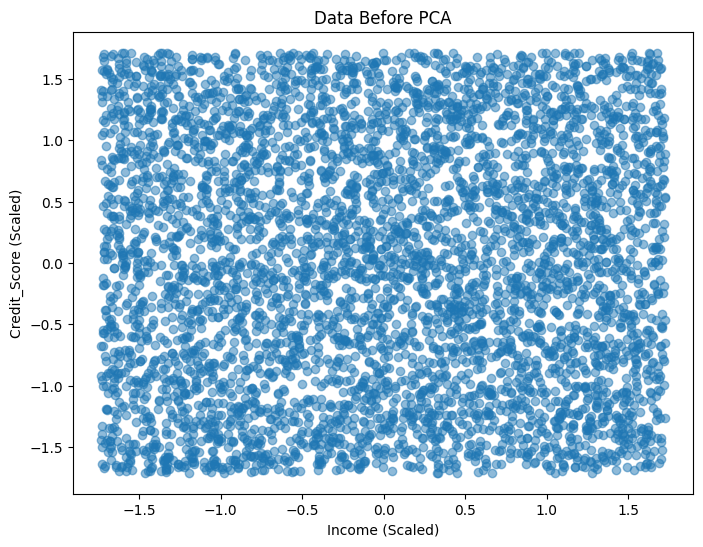

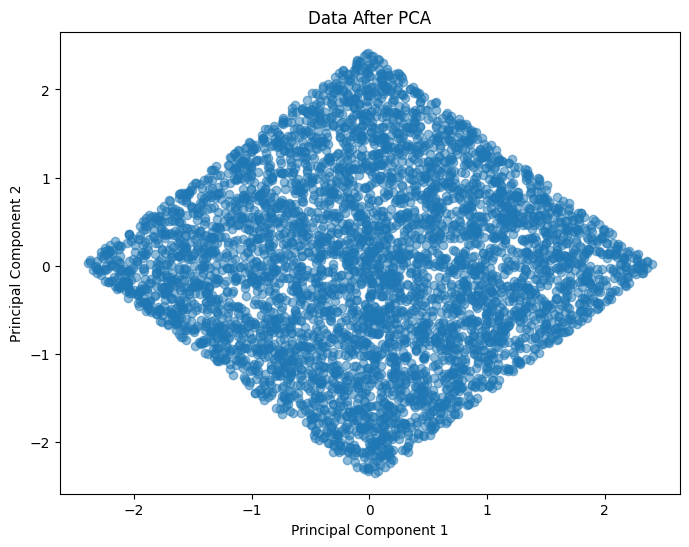

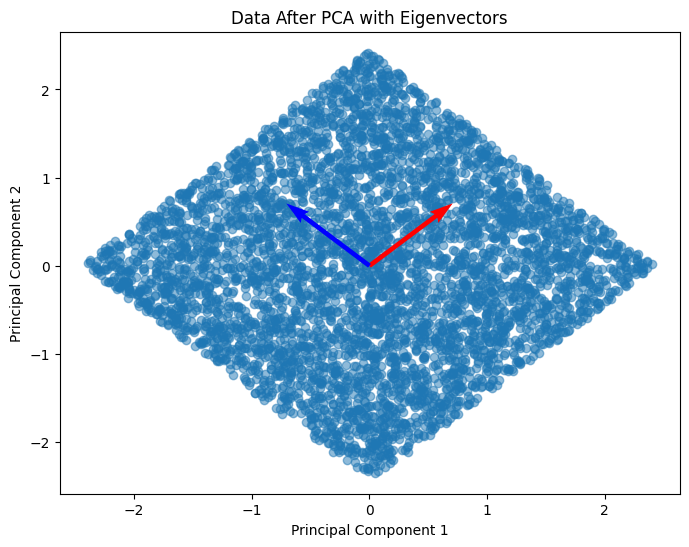

In [ ]:
#2-n

# Select the features for PCA
features = ['Income', 'Credit_Score']
X = dataset[features]

# Standardize the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA with 2 components
pca = PCA(n_components=2)  # Reduce to 2 dimensions
X_pca = pca.fit_transform(X_scaled)

# Before PCA
#scatter showing the pca before standardization
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], alpha=0.5)
plt.xlabel('Income (Scaled)')
plt.ylabel('Credit_Score (Scaled)')
plt.title('Data Before PCA')
plt.show()

# scatter showing the pca after being standardized
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data After PCA')
plt.show()

eigenvectors = pca.components_

eigenvalues = pca.explained_variance_
scaled_eigenvectors = eigenvectors * np.sqrt(eigenvalues)[:, np.newaxis]

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data After PCA with Eigenvectors')

# Plot the eigenvectors as arrows
# The origin of the arrows is the mean of the data (which is 0, 0 after scaling)
plt.quiver([0, 0], [0, 0], scaled_eigenvectors[:, 0], scaled_eigenvectors[:, 1],
           angles='xy', scale_units='xy', scale=1, color=['red', 'blue'])

plt.show()

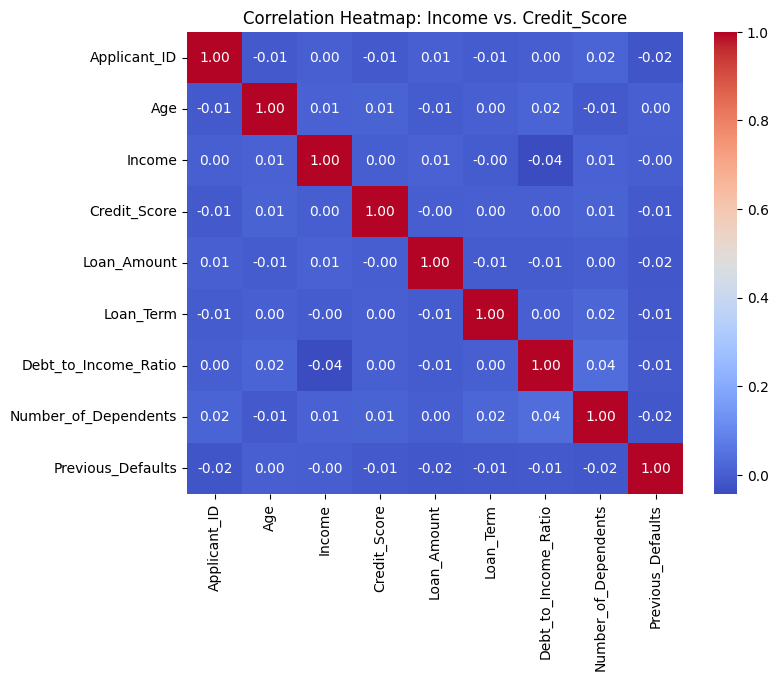

In [ ]:
#2-o
# Select the columns for correlation analysis

# Create the heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = dataset.select_dtypes(include=['number']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Income vs. Credit_Score')
plt.show()

In [ ]:
#3-a
#show the correclation matrix between numerical attributes
numerical_features = dataset.select_dtypes(include=['number'])
#calculate correlation between all numerical attibutes
correlation_matrix = numerical_features.corr()

print(correlation_matrix)


                      Applicant_ID       Age    Income  Credit_Score  \
Applicant_ID              1.000000 -0.010360  0.001925     -0.008249   
Age                      -0.010360  1.000000  0.009228      0.010137   
Income                    0.001925  0.009228  1.000000      0.000600   
Credit_Score             -0.008249  0.010137  0.000600      1.000000   
Loan_Amount               0.005366 -0.005220  0.007326     -0.001115   
Loan_Term                -0.006222  0.002661 -0.003589      0.004614   
Debt_to_Income_Ratio      0.000160  0.016105 -0.043472      0.001723   
Number_of_Dependents      0.017009 -0.010104  0.005889      0.012144   
Previous_Defaults        -0.022782  0.002799 -0.000607     -0.008667   

                      Loan_Amount  Loan_Term  Debt_to_Income_Ratio  \
Applicant_ID             0.005366  -0.006222              0.000160   
Age                     -0.005220   0.002661              0.016105   
Income                   0.007326  -0.003589             -0.043472   

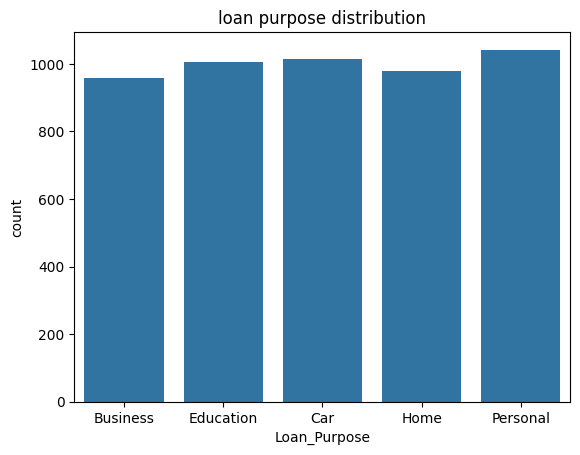

In [ ]:
#3-b
# Find the class distribution
class_distribution = dataset['Loan_Purpose'].value_counts()


#histogram to display the distribution of categorial data
# y axis displays the count of each of the categories in the loan purpose
sns.countplot(x='Loan_Purpose', data=dataset)
plt.title('loan purpose distribution')
plt.show()

In [ ]:
#3-c
dataset['IncomeCreditRatio'] = dataset['Income'] / dataset['Credit_Score']
print(dataset[['Income', 'Credit_Score', 'IncomeCreditRatio']])
print(dataset.dtypes)


        Income  Credit_Score  IncomeCreditRatio
0    -1.695793      0.404040          -4.197090
1     0.305372      0.503777           0.606164
2    -0.256351     -0.668134           0.383682
3    -0.174538      1.102200          -0.158355
4    -1.692471     -1.060849           1.595392
...        ...           ...                ...
4995  1.140264      1.127135           1.011649
4996  1.008404      1.588419           0.634847
4997  1.089775     -0.661901          -1.646432
4998 -1.415921     -0.823973           1.718406
4999  0.854304     -1.484732          -0.575393

[5000 rows x 3 columns]
Applicant_ID               int64
Age                      float64
Income                   float64
Credit_Score             float64
Loan_Amount              float64
Loan_Term                  int64
Interest_Rate             object
Employment_Status         object
Debt_to_Income_Ratio     float64
Marital_Status            object
Number_of_Dependents       int64
Property_Ownership        object
Loa

In [ ]:

from sklearn.preprocessing import LabelEncoder

# Assuming your dataframe is named 'df'
# List of categorical columns to encode
categorical_cols = ['Interest_Rate', 'Employment_Status',
                    'Marital_Status', 'Property_Ownership',
                    'Loan_Purpose', 'Bins']

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_cols:
    if col in dataset.columns:
        dataset[col] = le.fit_transform(dataset[col])

# Now all columns should be numerical and ready for KNN
print(dataset.dtypes)


#do we convert all to integers or the things float or objects only????????

Applicant_ID              int64
Age                     float64
Income                  float64
Credit_Score            float64
Loan_Amount             float64
Loan_Term                 int64
Interest_Rate             int64
Employment_Status         int64
Debt_to_Income_Ratio    float64
Marital_Status            int64
Number_of_Dependents      int64
Property_Ownership        int64
Loan_Purpose              int64
Previous_Defaults         int64
Bins                      int64
IncomeCreditRatio       float64
dtype: object


In [ ]:
#import the dataset for the train and test data
from sklearn.model_selection import train_test_split

#splitting the data to x and y
#x is all the  columns except for the last one
X = dataset[[col for col in dataset.columns if col != 'Previous_Defaults']]
# y is only the last column
y = dataset['Previous_Defaults']
#binning the y as it is a continuous variable so we dividied it to 3 bins to be able to classify the point accordingly
#??????????????????????????
#y_binned = pd.cut(y, bins=3, labels=["Low", "Medium", "High"])
#transform the from categorical value bins to numerical values
le = LabelEncoder()
yBinned = le.fit_transform(y)

In [ ]:
#split the data to training and testing datasets
#70 % train and 30% test sizes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
#print(dataset.columns)

(3500, 15)
(1500, 15)


In [ ]:
#K-nn model
from sklearn.neighbors import KNeighborsClassifier
#doing the knn to the nearest 3 neighbours for each point
neigh = KNeighborsClassifier(n_neighbors=3)
#fitting in the model the x train and the y train to train on them to be able to predict the y test
neigh.fit(X_train, y_train)
# use x test to predict the value of the y
y_pred = neigh.predict(X_test)


In [ ]:
# testing the knn accuracy , confusion matrix ,

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#testing the accuracy of the knn model using the accuracy score to test the percentage accurcy between the y test and the y pred
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


#putting the y test values into y confusion to be able to add to the confusion matrix
yConfusion = y_test
#put the y confusion and the y prediciton as parameters to the confusion matrix to compare the actual with the predicted ones
confusionMatrix = confusion_matrix(yConfusion, y_pred)
print(confusionMatrix)

# a classification report to show the recall and the precision of the model
print(classification_report(y_test, y_pred))




Accuracy: 0.874
[[1308   38]
 [ 151    3]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1346
           1       0.07      0.02      0.03       154

    accuracy                           0.87      1500
   macro avg       0.48      0.50      0.48      1500
weighted avg       0.81      0.87      0.84      1500



In [ ]:
#The naive bayes model
from sklearn.naive_bayes import GaussianNB
#doing the same thing and the same trains and tests but instead of the knn we will be using the naive bayes classifier
NaiveBayesClassifier = GaussianNB()
#put the x train and the y train to the classifier to train on
NaiveBayesClassifier.fit(X_train, y_train)
# making the y predictor to predict the values based on the x test
y_predNaive = NaiveBayesClassifier.predict(X_test)


In [ ]:
#testing the naive bayes

accuracyNB = accuracy_score(y_test, y_predNaive)
print(f"Accuracy: {accuracyNB}")

#put the y test and the y prediciton as parameters to the confusion matrix to compare the actual with the predicted ones
confusionMatrix = confusion_matrix(y_test, y_predNaive)
print(confusionMatrix)

# a classification report to show the recall and the precision of the model
print(classification_report(yConfusion, y_pred))

#dataset skewed to true positives and false negatives

Accuracy: 0.8973333333333333
[[1346    0]
 [ 154    0]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1346
           1       0.07      0.02      0.03       154

    accuracy                           0.87      1500
   macro avg       0.48      0.50      0.48      1500
weighted avg       0.81      0.87      0.84      1500



[Text(0.8641073005563854, 0.9883720930232558, 'x[2] <= -1.727\ngini = 0.177\nsamples = 3500\nvalue = [3157, 343]'),
 Text(0.788358285149764, 0.9651162790697675, 'x[4] <= -1.249\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.8262327928530747, 0.9767441860465116, 'True  '),
 Text(0.7850113111541831, 0.9418604651162791, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.791705259145345, 0.9418604651162791, 'x[4] <= -0.462\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.788358285149764, 0.9186046511627907, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.7950522331409259, 0.9186046511627907, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.9398563159630068, 0.9651162790697675, 'x[6] <= 1196.5\ngini = 0.176\nsamples = 3494\nvalue = [3154, 340]'),
 Text(0.9019818082596961, 0.9767441860465116, '  False'),
 Text(0.8904726303571195, 0.9418604651162791, 'x[6] <= 1195.5\ngini = 0.18\nsamples = 3397\nvalue = [3058, 339]'),
 Text(0.8017461811320878, 0.9186046511627907, 'x[0] <= 41

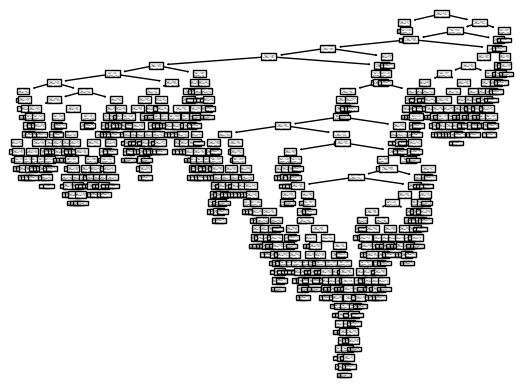

In [ ]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()

clf = clf.fit(X_train, y_train)

y_pred_clf = clf.predict(X_test)


tree.plot_tree(clf)

In [ ]:
report = classification_report(y_test, y_pred_clf)
print("Classification Report for Decision Tree Classifier:")
print(report)

Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      1346
           1       0.10      0.12      0.11       154

    accuracy                           0.80      1500
   macro avg       0.50      0.50      0.50      1500
weighted avg       0.82      0.80      0.80      1500



In [ ]:
accuracy_clf = accuracy_score(y_test, y_pred_clf)
print(f"Accuracy of Decision Tree Classifier: {accuracy_clf}")

Accuracy of Decision Tree Classifier: 0.7953333333333333


In [ ]:
confusion_matrix_clf = confusion_matrix(y_test, y_pred_clf)
print("Confusion Matrix for Decision Tree Classifier:")
print(confusion_matrix_clf)

Confusion Matrix for Decision Tree Classifier:
[[1174  172]
 [ 135   19]]


In [ ]:
from sklearn import svm

clc = svm.SVC()
clc.fit(X_train, y_train)

y_pred_clc = clc.predict(X_test)

support_vectors = clc.support_vectors_
print("Support Vectors:")
print(support_vectors)

Support Vectors:
[[ 2.48700000e+03  2.95985914e-01  3.74831265e-02 ...  4.00000000e+00
   4.00000000e+00 -2.70637284e-02]
 [ 3.01300000e+03 -1.31285178e+00 -1.49978841e+00 ...  4.00000000e+00
   3.00000000e+00  2.85803537e+00]
 [ 1.15200000e+03 -8.43607450e-01 -2.24375023e-01 ...  4.00000000e+00
   1.00000000e+00  1.75426722e-01]
 ...
 [ 1.26800000e+03  8.99300048e-01  1.55036451e+00 ...  0.00000000e+00
   3.00000000e+00  8.94107389e+00]
 [ 1.18500000e+03  8.99300048e-01  7.34139113e-01 ...  1.00000000e+00
   0.00000000e+00  7.51015345e-01]
 [ 3.17200000e+03  2.78462990e-02  5.98053536e-01 ...  3.00000000e+00
   3.00000000e+00 -1.19651931e+00]]


In [ ]:
accuracy_clc = accuracy_score(y_test, y_pred_clc)
print(f"Accuracy of Support Vector Classifier: {accuracy_clc}")

Accuracy of Support Vector Classifier: 0.8973333333333333


In [ ]:
confusion_matrix_clc = confusion_matrix(y_test, y_pred_clc)
print("Confusion Matrix for Support Vector Classifier:")
print(confusion_matrix_clc)


Confusion Matrix for Support Vector Classifier:
[[1346    0]
 [ 154    0]]


In [ ]:
report_clc = classification_report(y_test, y_pred_clc)
print("Classification Report for Support Vector Classifier:")
print(report_clc)

Classification Report for Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1346
           1       0.00      0.00      0.00       154

    accuracy                           0.90      1500
   macro avg       0.45      0.50      0.47      1500
weighted avg       0.81      0.90      0.85      1500



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os
import random

seed_value = 42  # Choose any desired seed value

os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# Define the model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    layers.Dense(32, activation='relu'),  # Hidden layer
    layers.Dense(1, activation='sigmoid')  # Output layer (for binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # For binary classification
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)  # Adjust epochs and batch size



Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8359 - loss: 5.3887
Epoch 2/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7950 - loss: 2.6534
Epoch 3/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8422 - loss: 1.4917
Epoch 4/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8166 - loss: 1.3566
Epoch 5/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8358 - loss: 1.5038
Epoch 6/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8524 - loss: 0.9186
Epoch 7/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8436 - loss: 1.3282
Epoch 8/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8187 - loss: 1.5147
Epoch 9/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8194 - loss: 1.3538
Epoch 10/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8638 - loss: 0.7501


In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8948 - loss: 0.4460
Test Accuracy: 0.8899999856948853


In [ ]:
# Generate confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(confusion_mtx)


Confusion Matrix:
[[1335   11]
 [ 154    0]]


In [ ]:
# Generate classification report
report = classification_report(y_test, y_pred_classes)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1346
           1       0.00      0.00      0.00       154

    accuracy                           0.89      1500
   macro avg       0.45      0.50      0.47      1500
weighted avg       0.80      0.89      0.85      1500

